In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [21]:
center = pd.read_csv('fulfilment_center_info.csv')
center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [22]:
meal= pd.read_csv('meal_info.csv')
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [23]:
df = pd.merge(df_train, center, on='center_id')
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0


In [24]:
df = pd.merge(df, meal, on='meal_id')
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


### Understanding the data

In [25]:
df.shape

(456548, 15)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [27]:
df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [28]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


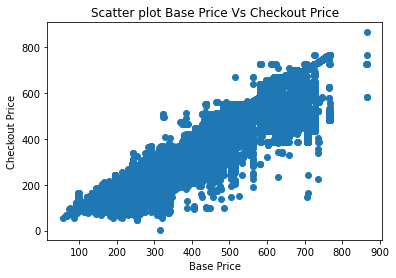

In [29]:
plt.scatter(df['base_price'], df['checkout_price'])
plt.title('Scatter plot Base Price Vs Checkout Price')
plt.xlabel('Base Price')
plt.ylabel('Checkout Price')
plt.show()

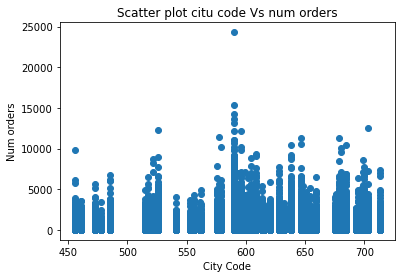

In [30]:
plt.scatter(df['city_code'], df['num_orders'])
plt.title('Scatter plot citu code Vs num orders')
plt.xlabel('City Code')
plt.ylabel('Num orders')
plt.show()

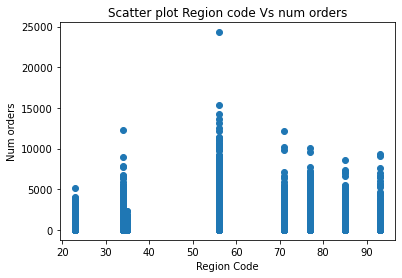

In [31]:
plt.scatter(df['region_code'], df['num_orders'])
plt.title('Scatter plot Region code Vs num orders')
plt.xlabel('Region Code')
plt.ylabel('Num orders')
plt.show()

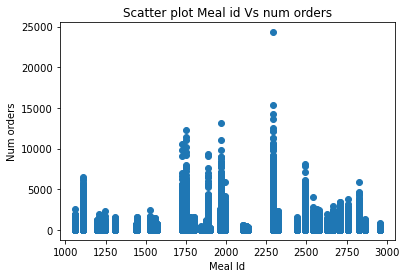

In [32]:
plt.scatter(df['meal_id'], df['num_orders'])
plt.title('Scatter plot Meal id Vs num orders')
plt.xlabel('Meal Id')
plt.ylabel('Num orders')
plt.show()

In [33]:
plt.rcParams['figure.figsize'] = [15,8]

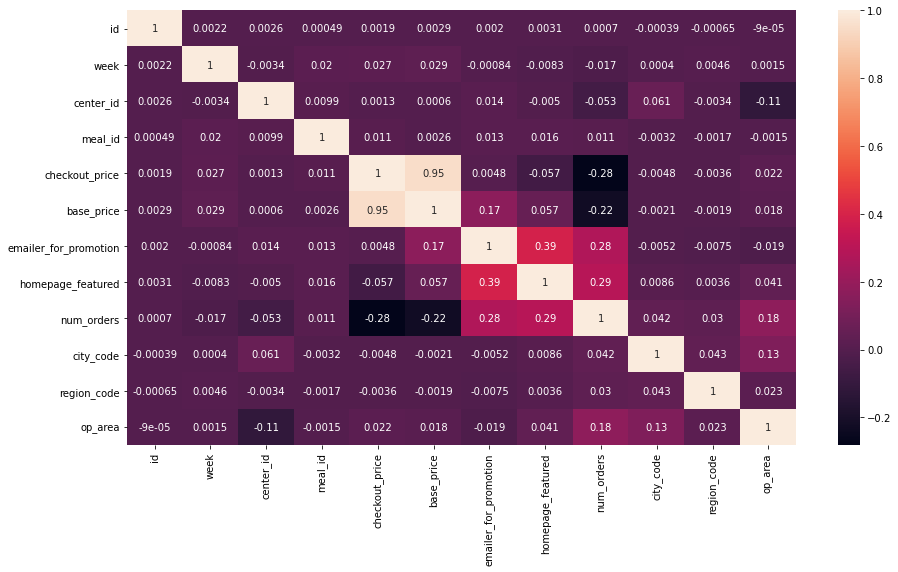

In [34]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [35]:
df.cov()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
id,2.083831e+10,13338.481045,17529.997840,38598.064638,42857.295215,67499.441640,78.878070,140.055974,40125.025830,-3694.822774,-1650.504776,-14.147536
week,1.333848e+04,1724.322002,-6.586155,450.413632,168.813897,190.959362,-0.009539,-0.107017,-282.942655,1.112318,3.369388,0.070246
center_id,1.753000e+04,-6.586155,2113.704856,248.985790,9.476541,4.465995,0.171468,-0.072309,-965.367349,185.881700,-2.778937,-5.614731
meal_id,3.859806e+04,450.413632,248.985790,299669.663796,899.834716,229.198248,2.003365,2.792280,2296.681858,-115.876383,-16.049955,-0.924068
checkout_price,4.285730e+04,168.813897,9.476541,899.834716,23390.558965,23434.157890,0.201202,-2.727721,-17082.316071,-48.643547,-9.843546,3.601254
base_price,6.749944e+04,190.959362,4.465995,229.198248,23434.157890,25829.605010,7.512182,2.865004,-14145.582841,-21.853276,-5.484724,3.163591
emailer_for_promotion,7.887807e+01,-0.009539,0.171468,2.003365,0.201202,7.512182,0.074567,0.033261,29.963571,-0.094607,-0.035945,-0.005802
homepage_featured,1.400560e+02,-0.107017,-0.072309,2.792280,-2.727721,2.865004,0.033261,0.097276,36.364962,0.178390,0.019838,0.014130
num_orders,4.012503e+04,-282.942655,-965.367349,2296.681858,-17082.316071,-14145.582841,29.963571,36.364962,156754.861772,1090.167195,207.750619,76.493318
city_code,-3.694823e+03,1.112318,185.881700,-115.876383,-48.643547,-21.853276,-0.094607,0.178390,1090.167195,4381.899093,49.847637,9.501144


id


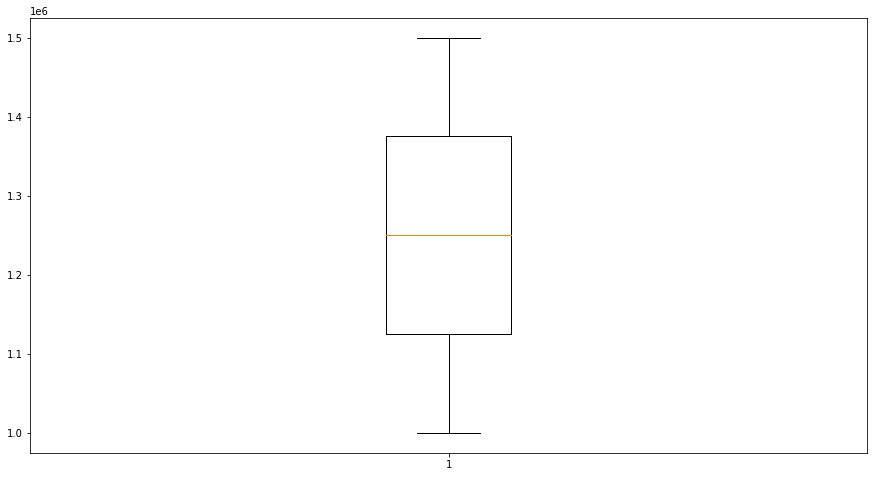

week


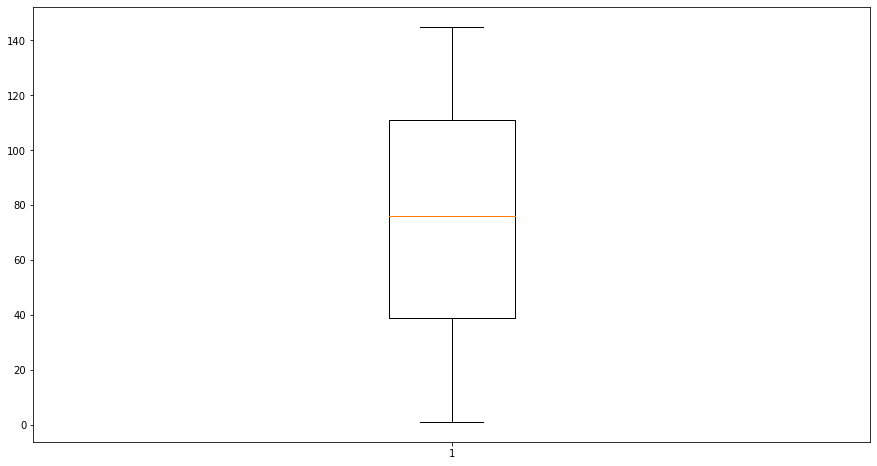

center_id


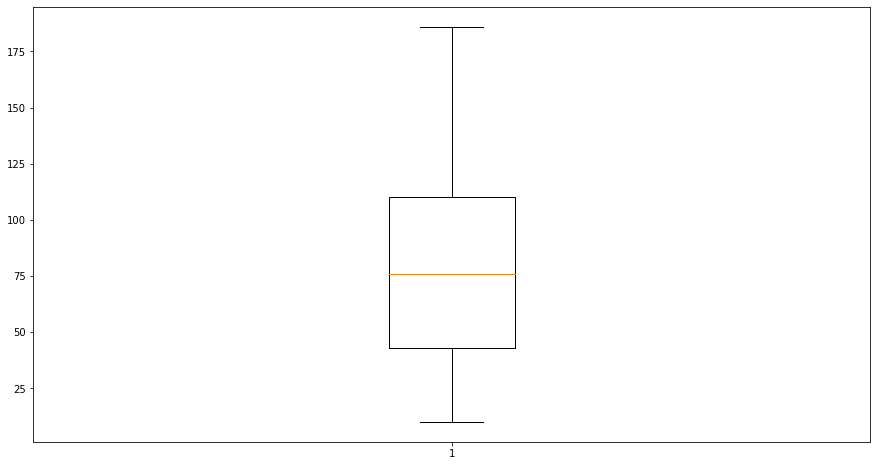

meal_id


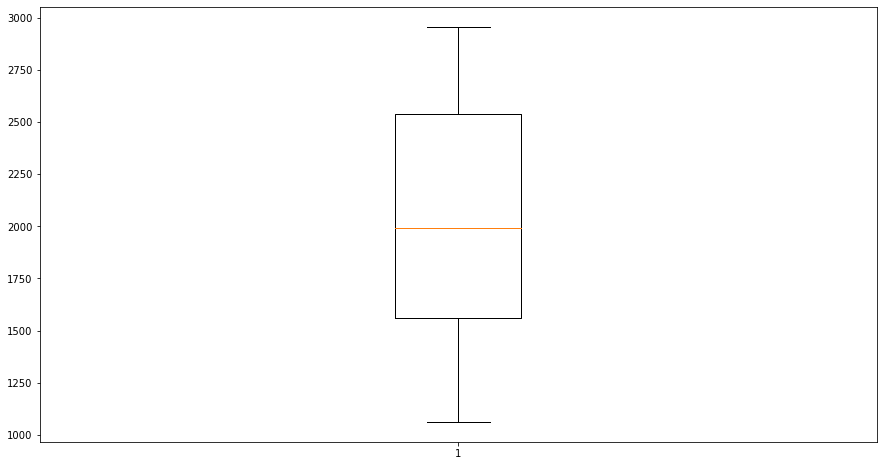

checkout_price


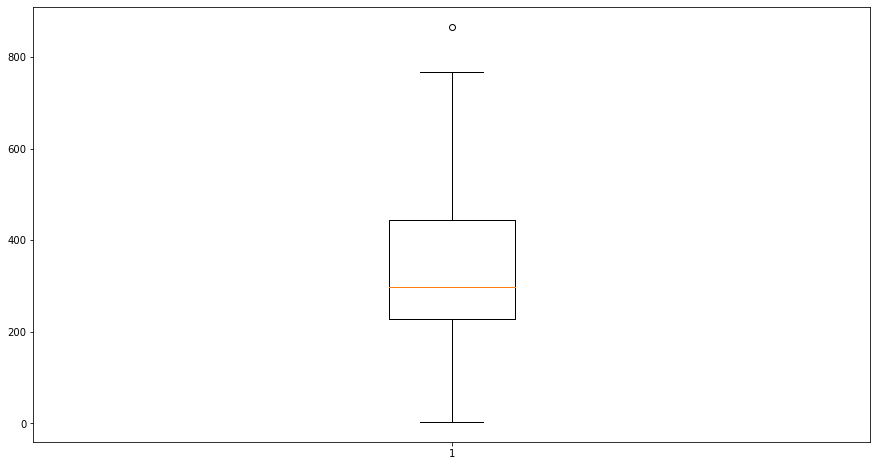

base_price


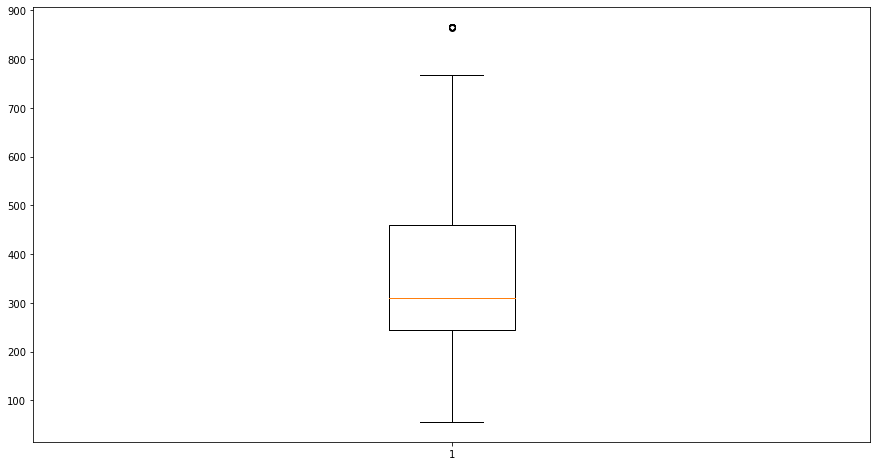

emailer_for_promotion


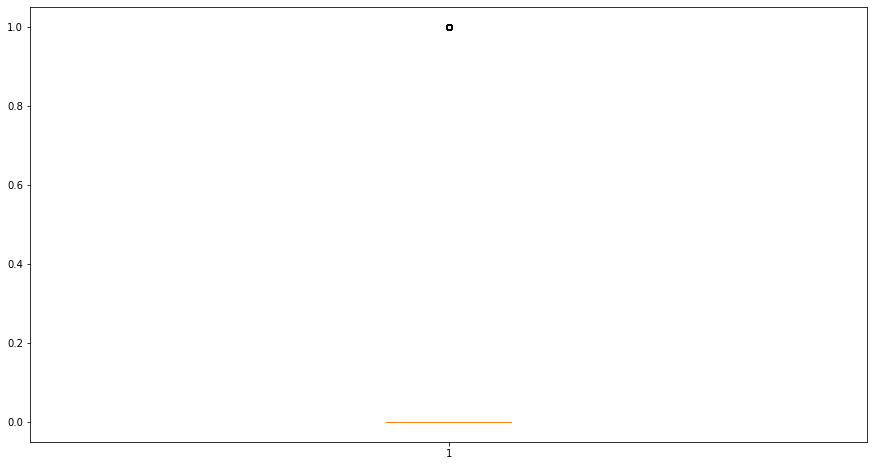

homepage_featured


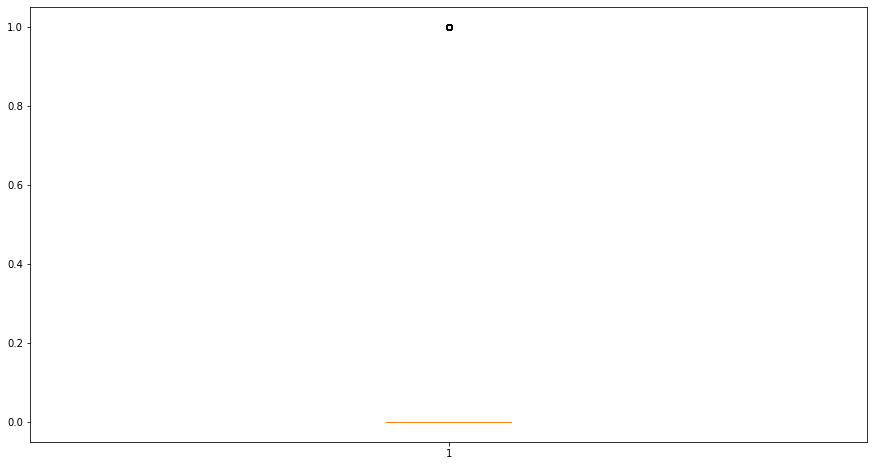

city_code


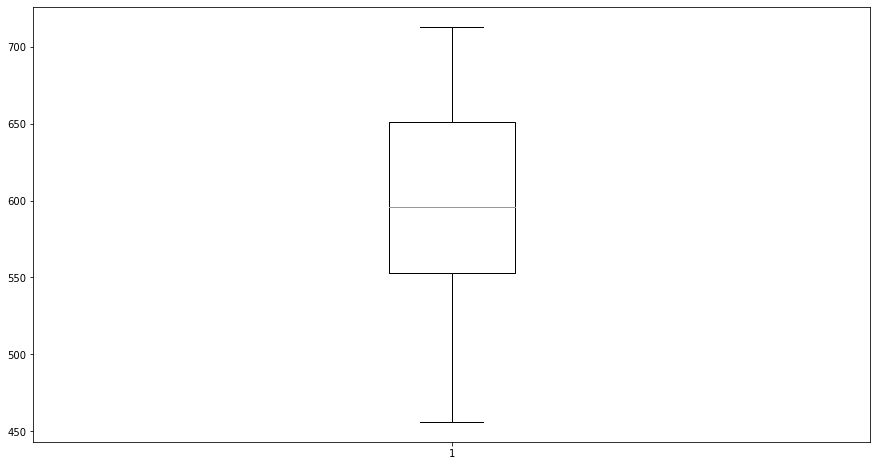

region_code


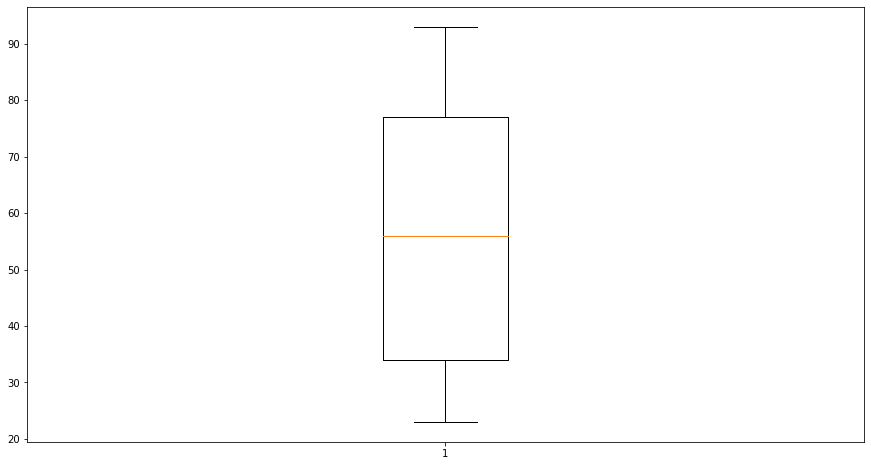

center_type


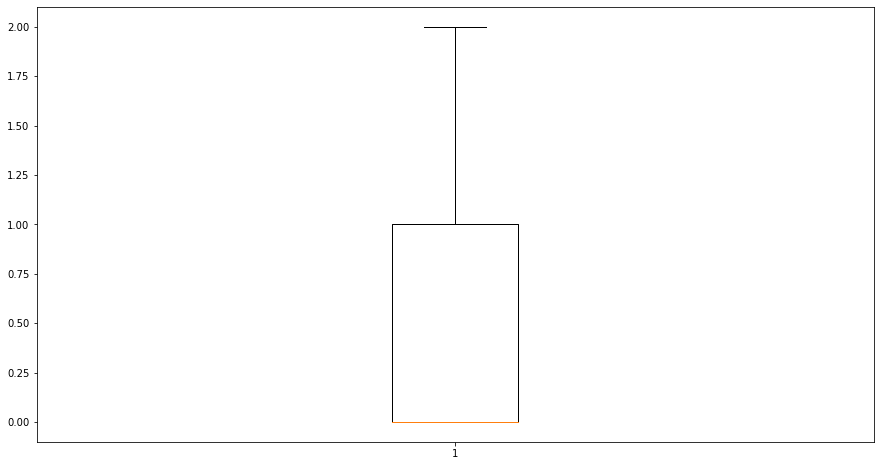

op_area


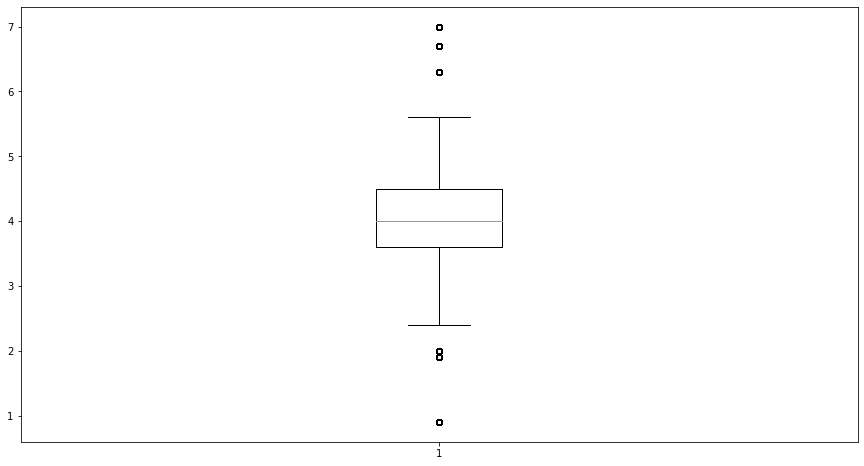

category


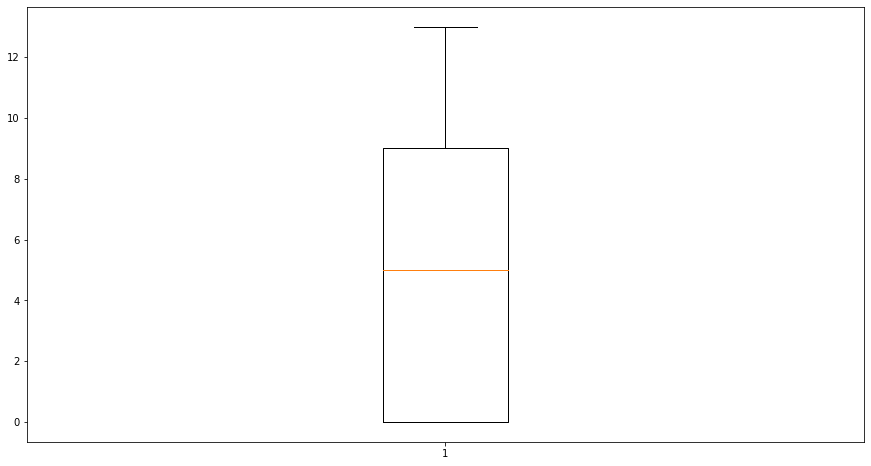

cuisine


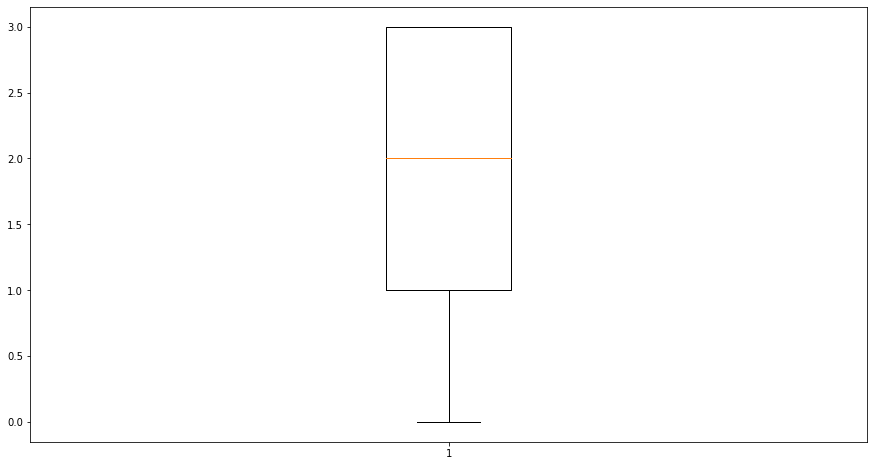

In [44]:
for i in df.drop('num_orders',axis=1).columns:
    print(i)
    plt.boxplot(df[i])
    plt.show()

## feature engineering

In [37]:
df.select_dtypes(include='object').columns

Index(['center_type', 'category', 'cuisine'], dtype='object')

In [38]:
df['center_type'].value_counts()

TYPE_A    262881
TYPE_C     99593
TYPE_B     94074
Name: center_type, dtype: int64

In [39]:
df['category'].value_counts()

Beverages       127890
Rice Bowl        33408
Sandwich         33291
Pizza            33138
Starters         29941
Other Snacks     29379
Desert           29294
Salad            28559
Pasta            27694
Seafood          26916
Biryani          20614
Extras           13562
Soup             12675
Fish             10187
Name: category, dtype: int64

In [40]:
df['cuisine'].value_counts()

Italian        122925
Thai           118216
Indian         112612
Continental    102795
Name: cuisine, dtype: int64

In [41]:
le = LabelEncoder()

In [42]:
df['center_type'] = le.fit_transform(df['center_type'])
df['category'] = le.fit_transform(df['category'])
df['cuisine'] = le.fit_transform(df['cuisine'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  int32  
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  int32  
 14  cuisine                456548 non-nu

In [45]:
df.drop('id',axis=1,inplace=True)
df.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1,55,1885,136.83,152.29,0,0,177,647,56,2,2.0,0,3
1,2,55,1885,135.83,152.29,0,0,323,647,56,2,2.0,0,3
2,3,55,1885,132.92,133.92,0,0,96,647,56,2,2.0,0,3
3,4,55,1885,135.86,134.86,0,0,163,647,56,2,2.0,0,3
4,5,55,1885,146.50,147.50,0,0,215,647,56,2,2.0,0,3


## Splitting the data

In [46]:
X = df.drop('num_orders',axis=1)
y = df['num_orders']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (319583, 13)
X_test shape (136965, 13)
y_train shape (319583,)
y_test shape (136965,)


In [47]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error

### Linear Regression

In [48]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print('Coefficient of model :',lr.coef_,'\n')
print('intercept of model :',lr.intercept_,'\n')
pred_train = lr.predict(X_train)
rmse_train = mean_squared_error(y_train,pred_train)**(0.5)
print('RMSE on train :',rmse_train)
pred_test = lr.predict(X_test)
rmse_test = mean_squared_error(y_test,pred_test)**(0.5)
print('RMSE on test :',rmse_test)

Coefficient of model : [-6.55663839e-02 -3.36017324e-01 -4.20892597e-04 -4.63879439e-01
 -6.93977467e-01  2.97435292e+02  2.67432311e+02  1.16870373e-01
  5.97057679e-01 -3.39531501e+00  6.18227166e+01  1.40818500e+01
 -6.78859683e+01] 

intercept of model : 319.43970396845697 

RMSE on train : 345.1523034412394
RMSE on test : 340.3033544666281


### Decision Tree

In [49]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred_train = dt.predict(X_train)
rmse_train = mean_squared_error(y_train,pred_train)**(0.5)
print('RMSE on train :',rmse_train)
pred_test = dt.predict(X_test)
rmse_test = mean_squared_error(y_test,pred_test)**(0.5)
print('RMSE on test :',rmse_test)

RMSE on train : 0.0
RMSE on test : 223.01398031918865


### Lasso regression

In [50]:
ls = Lasso()
ls.fit(X_train,y_train)
pred_train = ls.predict(X_train)
rmse_train = mean_squared_error(y_train,pred_train)**(0.5)
print('RMSE on train :',rmse_train)
pred_test = ls.predict(X_test)
rmse_test = mean_squared_error(y_test,pred_test)**(0.5)
print('RMSE on test :',rmse_test)

RMSE on train : 345.19487118258644
RMSE on test : 340.34297286414375


### Ridge Regression

In [51]:
ri = Ridge()
ri.fit(X_train,y_train)
pred_train = ri.predict(X_train)
rmse_train = mean_squared_error(y_train,pred_train)**(0.5)
print('RMSE on train :',rmse_train)
pred_test = ri.predict(X_test)
rmse_test = mean_squared_error(y_test,pred_test)**(0.5)
print('RMSE on test :',rmse_test)

RMSE on train : 345.1523034712292
RMSE on test : 340.30334754088426


### Random Forest

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred_train = rf.predict(X_train)
rmse_train = mean_squared_error(y_train,pred_train)**(0.5)
print('RMSE on train :',rmse_train)
pred_test = rf.predict(X_test)
rmse_test = mean_squared_error(y_test,pred_test)**(0.5)
print('RMSE on test :',rmse_test)

### XGBoost

In [52]:
xg = XGBRegressor()
xg.fit(X_train,y_train)
pred_train = xg.predict(X_train)
rmse_train = mean_squared_error(y_train,pred_train)**(0.5)
print('RMSE on train :',rmse_train)
pred_test = xg.predict(X_test)
rmse_test = mean_squared_error(y_test,pred_test)**(0.5)
print('RMSE on test :',rmse_test)
print("Training Accuracy")
print(xg.score(X_train,y_train))
print("Testing Accuracy")
print(xg.score(X_test,y_test))

RMSE on train : 139.96498445568147
RMSE on test : 153.46471929259155
Training Accuracy
0.8757739844351342
Testing Accuracy
0.8476158587395584


# Building model with transformed data

In [53]:
pt = PowerTransformer()

In [54]:
pt.fit(X_train)
x_train = pt.transform(X_train)
x_train = pd.DataFrame(x_train)
x_train.columns = X_train.columns
x_train.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,-1.024184,-0.578818,-0.860682,2.028394,1.875620,-0.296844,-0.349901,0.526057,0.013692,-0.847930,2.411523,0.562359,-1.464586
1,0.505781,0.213815,-0.113382,-0.037091,-0.169058,-0.296844,-0.349901,1.534587,1.537451,1.387653,-0.015692,1.016315,0.430711
2,1.299508,-1.177806,1.013621,0.094850,-0.043207,-0.296844,-0.349901,-0.005094,0.013692,-0.847930,-0.494339,1.400159,1.264958
3,-2.064623,0.469973,0.501889,1.021048,0.884327,-0.296844,-0.349901,-0.126808,0.825763,-0.847930,0.436820,-0.525433,-0.464980
4,0.847760,-0.478101,-1.407864,-1.336207,-1.470097,-0.296844,-0.349901,0.670390,0.013692,1.387653,-2.142706,-1.334768,-0.464980


In [55]:
pt.fit(X_test)
x_test = pt.transform(X_test)
x_test = pd.DataFrame(x_test)
x_test.columns = X_test.columns
x_test.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,-0.393122,-0.035956,-0.126464,1.195012,1.554978,3.355870,-0.350641,1.585108,-1.248555,-0.845644,-1.220605,0.563506,-1.460826
1,0.059679,-0.213693,1.174554,0.143583,0.005143,-0.297985,-0.350641,0.683470,-1.313806,-0.845644,0.071878,0.874565,0.434006
2,-1.683994,1.271919,-1.727365,-1.283106,-1.439067,-0.297985,-0.350641,0.238849,1.139362,-0.845644,-0.113658,-1.333325,0.434006
3,-2.066376,-1.375496,0.536062,0.105317,0.373832,-0.297985,-0.350641,0.145626,1.541655,0.902727,-0.400208,-1.333325,-1.460826
4,0.995409,-0.524327,-1.069797,-0.909143,-0.615300,-0.297985,-0.350641,-0.219980,0.015706,-0.845644,-0.208039,1.276858,1.266221


### Linear regression

In [56]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print('Coefficient of model :',lr.coef_,'\n')
print('intercept of model :',lr.intercept_,'\n')
pred_train = lr.predict(x_train)
rmse_train = mean_squared_error(y_train,pred_train)**(0.5)
print('RMSE on train :',rmse_train)
pred_test = lr.predict(x_test)
rmse_test = mean_squared_error(y_test,pred_test)**(0.5)
print('RMSE on test :',rmse_test)

Coefficient of model : [  -3.39443069  -18.58106146   -3.29467107 -100.33318756 -101.09961887
   75.99439269   79.53805737    7.7768802    12.41328613    0.3876127
   66.48674926   85.11494264  -82.1377409 ] 

intercept of model : 261.78123054104856 

RMSE on train : 343.85769918513734
RMSE on test : 338.989039700945


### Decision tree

In [57]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_train = dt.predict(x_train)
rmse_train = mean_squared_error(y_train,pred_train)**(0.5)
print('RMSE on train :',rmse_train)
pred_test = dt.predict(x_test)
rmse_test = mean_squared_error(y_test,pred_test)**(0.5)
print('RMSE on test :',rmse_test)

RMSE on train : 0.0
RMSE on test : 228.3471335116363


### Lasso Regression

In [58]:
ls = Lasso()
ls.fit(x_train,y_train)
pred_train = ls.predict(x_train)
rmse_train = mean_squared_error(y_train,pred_train)**(0.5)
print('RMSE on train :',rmse_train)
pred_test = ls.predict(x_test)
rmse_test = mean_squared_error(y_test,pred_test)**(0.5)
print('RMSE on test :',rmse_test)

RMSE on train : 343.898028245359
RMSE on test : 339.0449264964229


### Ridge Regression

In [59]:
ri = Ridge()
ri.fit(x_train,y_train)
pred_train = ri.predict(x_train)
rmse_train = mean_squared_error(y_train,pred_train)**(0.5)
print('RMSE on train :',rmse_train)
pred_test = ri.predict(x_test)
rmse_test = mean_squared_error(y_test,pred_test)**(0.5)
print('RMSE on test :',rmse_test)

RMSE on train : 343.85769918765226
RMSE on test : 338.98904201442906


### XGBoost

In [60]:
xg = XGBRegressor()
xg.fit(x_train,y_train)
pred_train = xg.predict(x_train)
rmse_train = mean_squared_error(y_train,pred_train)**(0.5)
print('RMSE on train :',rmse_train)
pred_test = xg.predict(x_test)
rmse_test = mean_squared_error(y_test,pred_test)**(0.5)
print('RMSE on test :',rmse_test)

RMSE on train : 139.96498445568147
RMSE on test : 156.80618772619394


# XGBoost without transformation of data gives us the least RMSE on Train and Test data.